In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv")
Data = pd.DataFrame(df)
Data["Data"] = pd.to_datetime(Data["Data"])

In [53]:
Data.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,2019-12-15,43,22,62,6
1,2019-12-22,47,22,65,4
2,2019-12-29,51,26,100,3
3,2020-01-05,44,20,74,4
4,2020-01-12,41,23,68,4


In [83]:
# 'month' 列を作成
Data['month'] = Data['Data'].dt.month

# 'date' 列を作成
Data['day'] = Data['Data'].dt.day

Data.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK,month,day
0,2019-12-15,43,22,62,6,12,15
1,2019-12-22,47,22,65,4,12,22
2,2019-12-29,51,26,100,3,12,29
3,2020-01-05,44,20,74,4,1,5
4,2020-01-12,41,23,68,4,1,12


In [84]:
Data_2019 = Data[(Data['Data'] >= '2019-12-15') & (Data['Data'] <= '2019-12-29')]
Data_2020 = Data[(Data['Data'] >= '2020-01-05') & (Data['Data'] <= '2020-12-27')]
Data_2021 = Data[(Data['Data'] >= '2021-01-03') & (Data['Data'] <= '2021-12-26')]
Data_2022 = Data[(Data['Data'] >= '2022-01-02') & (Data['Data'] <= '2022-12-25')]
Data_2023 = Data[(Data['Data'] >= '2023-01-01') & (Data['Data'] <= '2023-12-31')]
Data_2024 = Data[(Data['Data'] >= '2024-01-07') & (Data['Data'] <= '2024-12-15')]
print(Data_2019)

        Data  AIR JORDAN  AIR FORCE  AIR MAX  DUNK  month  day
0 2019-12-15          43         22       62     6     12   15
1 2019-12-22          47         22       65     4     12   22
2 2019-12-29          51         26      100     3     12   29


In [56]:
print(Data_2019.shape)
print(Data_2020.shape)
print(Data_2021.shape)
print(Data_2022.shape)
print(Data_2023.shape)
print(Data_2024.shape)

(3, 5)
(52, 5)
(52, 5)
(52, 5)
(53, 5)
(50, 5)


In [57]:
# H0 = 帰無仮説（H₀）: 2020年と2021年の「AIR_MAX」の検索数の平均に差はない。
# H1 = 対立仮説（H₁）: 2020年と2021年の「AIR_MAX」の検索数の平均に差がある。

In [58]:
import scipy.stats as stats
from scipy.stats import ttest_rel

In [87]:
# 2019年と2020年の検索数データ（例）
search_2019_AIR_JORDAN = Data_2019[["Data","AIR JORDAN","month","day"]] 
search_2020_AIR_JORDAN = Data_2020[["Data","AIR JORDAN","month","day"]]
search_2021_AIR_JORDAN = Data_2021[["Data","AIR JORDAN","month","day"]]
search_2022_AIR_JORDAN = Data_2022[["Data","AIR JORDAN","month","day"]]
search_2023_AIR_JORDAN = Data_2023[["Data","AIR JORDAN","month","day"]]
search_2024_AIR_JORDAN = Data_2024[["Data","AIR JORDAN","month","day"]]

In [90]:
print(search_2019_AIR_JORDAN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        3 non-null      datetime64[ns]
 1   AIR JORDAN  3 non-null      int64         
 2   month       3 non-null      int32         
 3   day         3 non-null      int32         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 96.0 bytes
None


In [94]:
mounth_group_2019 = search_2019_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()
mounth_group_2020 = search_2020_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()
mounth_group_2021 = search_2021_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()
mounth_group_2022 = search_2022_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()
mounth_group_2023 = search_2023_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()
mounth_group_2024 = search_2024_AIR_JORDAN.groupby("month")["AIR JORDAN"].sum()

In [99]:
print(mounth_group_2019.info())
print(mounth_group_2020.info())
print(mounth_group_2021.info())
print(mounth_group_2022.info())
print(mounth_group_2023.info())
print(mounth_group_2024.info())

<class 'pandas.core.series.Series'>
Index: 1 entries, 12 to 12
Series name: AIR JORDAN
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 12.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: AIR JORDAN
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 144.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: AIR JORDAN
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 144.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: AIR JORDAN
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 144.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: AIR JORDAN
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 144.0 bytes
N

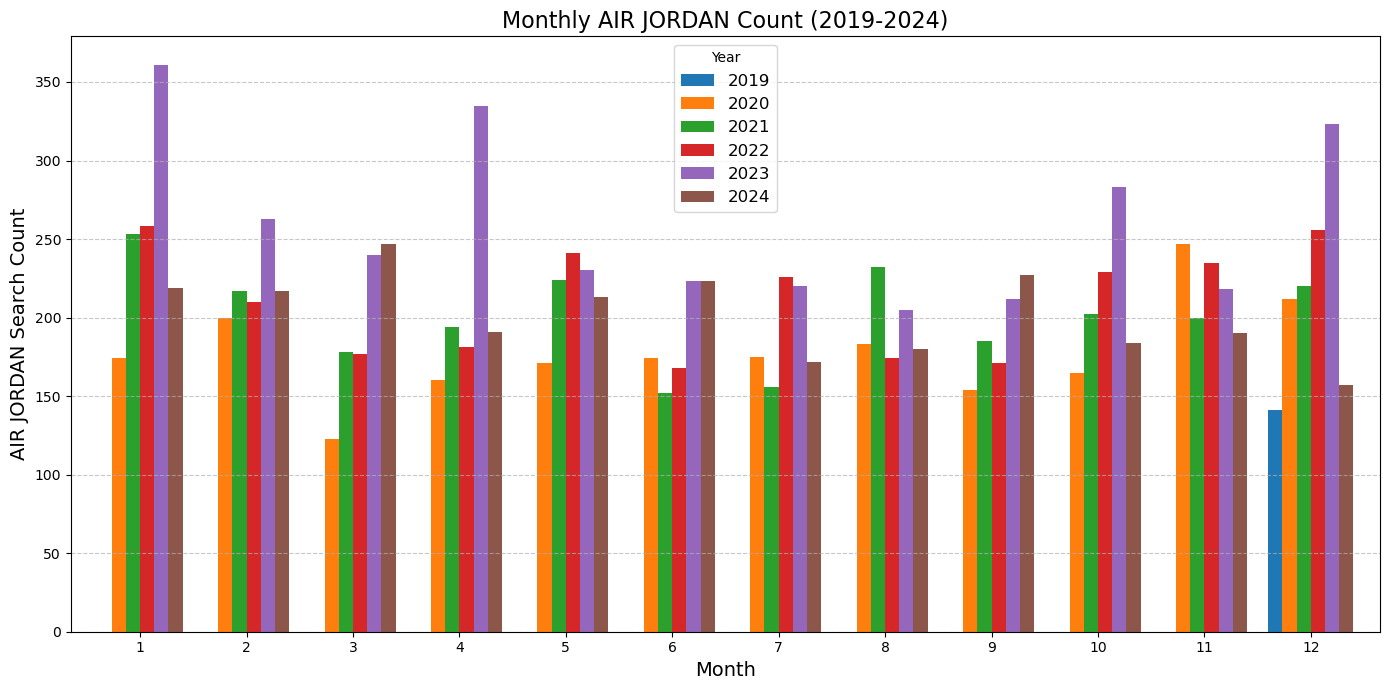

In [101]:
# データを補完 (1～12月を基準とする)
all_months = range(1, 13)
mounth_group_2019 = mounth_group_2019.reindex(all_months, fill_value=0)
mounth_group_2020 = mounth_group_2020.reindex(all_months, fill_value=0)
mounth_group_2021 = mounth_group_2021.reindex(all_months, fill_value=0)
mounth_group_2022 = mounth_group_2022.reindex(all_months, fill_value=0)
mounth_group_2023 = mounth_group_2023.reindex(all_months, fill_value=0)
mounth_group_2024 = mounth_group_2024.reindex(all_months, fill_value=0)

# 各年のデータを DataFrame にまとめる
data = pd.DataFrame({
    "2019": mounth_group_2019,
    "2020": mounth_group_2020,
    "2021": mounth_group_2021,
    "2022": mounth_group_2022,
    "2023": mounth_group_2023,
    "2024": mounth_group_2024,
})

# 棒グラフのプロット
data.plot(kind="bar", figsize=(14, 7), width=0.8)

# グラフの装飾
plt.title("Monthly AIR JORDAN Count (2019-2024)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("AIR JORDAN Search Count", fontsize=14)
plt.legend(title="Year", fontsize=12)
plt.xticks(ticks=range(0, 12), labels=range(1, 13), rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# グラフの表示
plt.tight_layout()
plt.show()

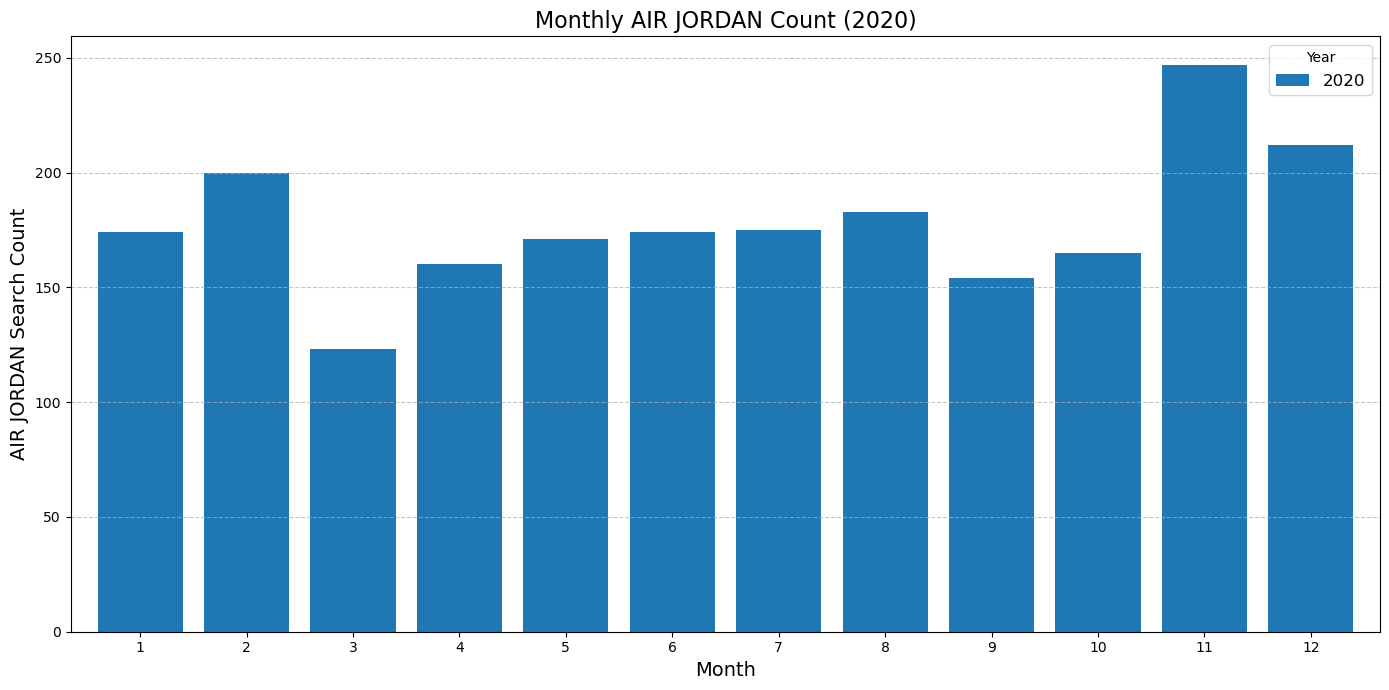

In [109]:
# 棒グラフのプロット
data["2020"].plot(kind="bar", figsize=(14, 7), width=0.8)

# グラフの装飾
plt.title("Monthly AIR JORDAN Count (2020)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("AIR JORDAN Search Count", fontsize=14)
plt.legend(title="Year", fontsize=12)
plt.xticks(ticks=range(0, 12), labels=range(1, 13), rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# グラフの表示
plt.tight_layout()
plt.show()

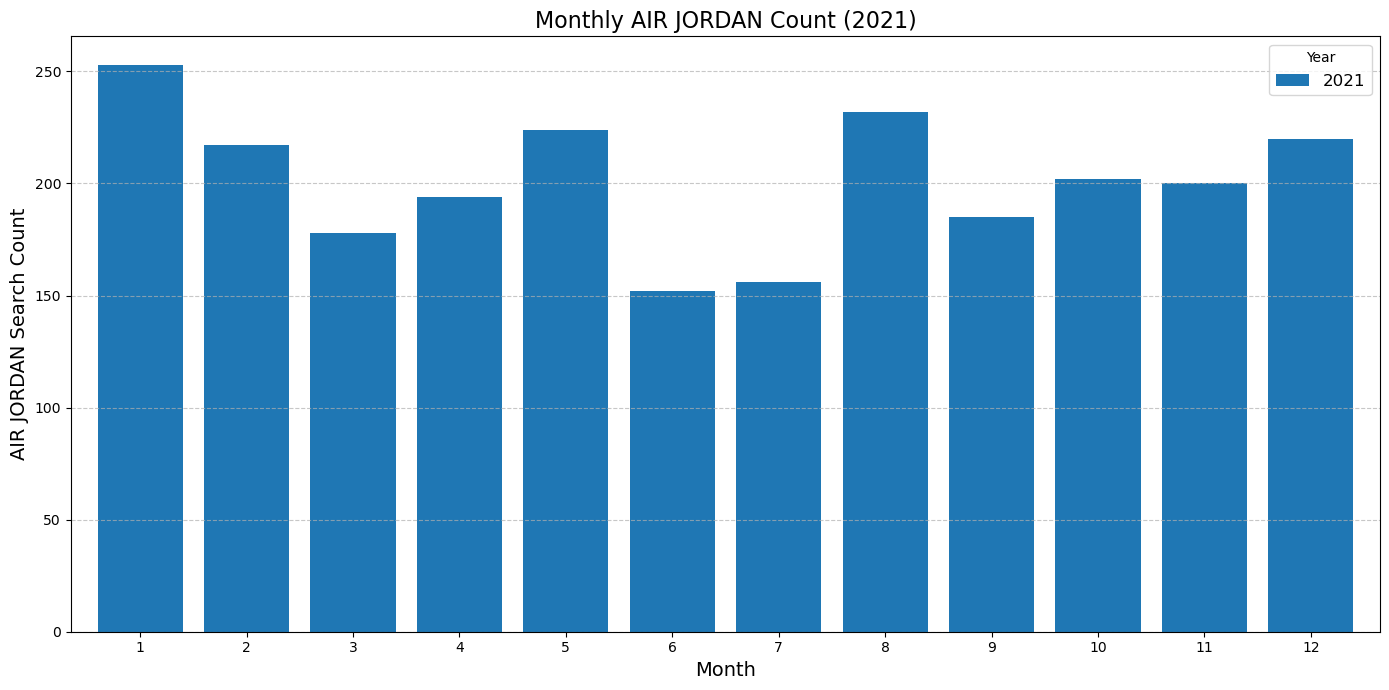

In [110]:
# 棒グラフのプロット
data["2021"].plot(kind="bar", figsize=(14, 7), width=0.8)

# グラフの装飾
plt.title("Monthly AIR JORDAN Count (2021)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("AIR JORDAN Search Count", fontsize=14)
plt.legend(title="Year", fontsize=12)
plt.xticks(ticks=range(0, 12), labels=range(1, 13), rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# グラフの表示
plt.tight_layout()
plt.show()